In [1]:
import numpy as np 
import astropy.constants as c
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import gc
import math
#list all the constants used
G=c.G.value
M_sun=c.M_sun.value
M_earth=c.M_earth.value
R_sun=c.R_sun.value
R_earth=c.R_earth.value
hour=3600 #s
day=3600*24
e=0.1
t_LC=1765.5 #s

def delta(Rp, Rs):
    delta = (Rp*R_earth / (Rs*R_sun))**2*1e6
    return delta

def SNR(delta,n,sigma_s):
    SNR=delta*n**0.5/sigma_s
    return SNR

def sigma_s(t, sigma_LC, cdppindex): #t/hour
    t_LC=1765.5/hour 

    return sigma_LC*(t/t_LC)**cdppindex

def t_dur(P,Rs,e,a): #hour
    t_dur = P*day*Rs*R_sun*(1-e**2)/(np.pi*a)/hour
    return t_dur

def a(Ms,P):
    a=((G*Ms*M_sun*(P*day)**2)/(4*np.pi**2))**(1/3)
    return a 

def n(t_obs,P): # the unite of t_obs and P is day
    n=t_obs/P
    return n

def f_n(t_obs,P):
    if t_obs <=2*P:
        return 0
    if t_obs> 2*P and t_obs< 3*P:
        return (t_obs/P-2)
    if t_obs>=3*P:
        return 1
    
def f_eff(SNR):
    if SNR <=6:
        return 0
    if SNR >6 and SNR<=12:
        return (SNR-6)/6
    if SNR>12:
        return 1
    
def f_geo(Rp,Rs,a,e):
    f_geo = (Rp*R_earth+Rs*R_sun)/(a*(1-e**2))
    return f_geo


stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_hot_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')


In [2]:
f_occurrence_everyplanet=[]

from subprocess import getoutput
filelist=getoutput('ls result/N_hot_2020/*.csv')
filename=[]
for line in filelist.split('\n'):
    filename.append(line)
    

    
with open('result/occurrence_rate_hot_2020.csv','w') as f:
    s=['i',
       'kepid',
       'occurrence_rate',]
    writer=csv.DictWriter(f,fieldnames=s)
    writer.writeheader()
    for i in range(0,len(filename)):
        koi_id=int(filename[i][18:-4])
        P=koi_table['koi_period'][koi_id]
        Rp=koi_table['koi_prad'][koi_id]
        Ms=koi_table['mass'][koi_id]
        Rs=koi_table['rad_b2018'][koi_id]
        a_temp=a(Ms,P)
        N_inf=pd.read_csv(filename[i],sep=',')
        fn=N_inf['fn']
        feff=N_inf['feff']
        N_s_temp=0
        for j in range(0,len(fn)):
            N_s_temp+=fn[j]*feff[j]
        
        del N_inf,fn,feff
        gc.collect()
        N_s_temp=round(N_s_temp)
        fgeo_temp=f_geo(Rp,Rs,a_temp,e)
        f_occurrence_temp=1./(fgeo_temp*N_s_temp)
        f_occurrence_everyplanet.append(f_occurrence_temp)
        print(koi_id,f_occurrence_temp,koi_table['kepid'][koi_id],len(koi_table))
        writer.writerow({'i':koi_id,
                         'kepid':koi_table['kepid'][koi_id],
                         'occurrence_rate':f_occurrence_temp,})

0 0.00036921904456304656 5120225 335
100 0.0008470625298067345 11192235 335
101 0.0024205083552872354 9049550 335
102 0.0003539059654068272 8260198 335
103 0.00023614785754849307 7137798 335
104 0.004020317869163502 10873178 335
105 0.0034113451352201147 4645174 335
106 0.0021002597549214827 4645174 335
107 0.0004904279251716041 8526387 335
108 0.013307310852928642 5959719 335
109 0.02399435765816257 5959719 335
10 0.001866528327578874 3241557 335
110 0.00032601421882448285 6929016 335
111 0.001172045654474065 9468717 335
112 0.015138108309321585 9782748 335
113 0.006730295704518538 6364143 335
114 0.00033970892577791086 5428471 335
115 0.0016605088609617953 12068975 335
116 0.003516681977703725 12068975 335
117 0.02217872153954472 12068975 335
118 0.002321748639683742 12068975 335
119 0.012014873342705774 8017703 335
11 0.0020003631364627376 8042453 335
120 0.033355466325398764 8017703 335
121 0.0031375047567846117 8017703 335
122 0.0012887781323169768 9773980 335
123 0.00313905918162

297 0.0011478488839303305 7620660 335
298 0.007222889598535513 10904004 335
299 0.002417481692999361 4948730 335
29 0.0030409130646746577 11499263 335
2 0.006117547639227289 10600261 335
300 0.0015374276330847624 6781548 335
301 0.0011722291205855417 9520668 335
302 0.04413687049438618 6685403 335
303 0.001813875895287213 2161949 335
304 0.0021751287953887086 2161949 335
305 0.011572228673421897 5015459 335
306 0.005844811056633244 5632701 335
307 0.0005040543034980553 6268722 335
308 0.00033815793324930694 11125936 335
309 0.000972428248391398 3526331 335
30 0.0002499287196186915 9153554 335
310 0.0020803167147650323 7668648 335
311 0.0025996066095483835 9334490 335
312 0.002111154569791965 4263529 335
313 0.00449400617820185 5796186 335
314 0.0002585904990347593 5040223 335
315 0.021719351527679738 5860347 335
316 0.0010784093214596328 8561063 335
317 0.0028422379674135564 8561063 335
318 0.008140183803414462 8561063 335
319 0.016568364690514557 10907307 335
31 0.0005591362577214036 

In [ ]:
stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

focc=pd.read_csv('result/occurrence_rate_hot_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
fig=plt.figure(figsize=(12,12))
for k in range(2,7):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=bins_radius[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.mean(focc_temp))
        f_p_std.append((np.std(focc_temp)))
        p.append(np.mean(np.mean(p_temp)))
        p_std.append(np.std(np.std(p_temp)))
        
    plt.errorbar(p,f_p,xerr=p_std,fmt="o-",color=colors[k],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius[k])+'-'+'{:.2f}'.format(bins_radius[k+1])+'R$_{\oplus}$')


stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction.csv',sep=',')
focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_tot.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
#colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#fig=plt.figure(figsize=(12,12))
for k in range(2,7):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=bins_radius[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.mean(focc_temp)*14)
        f_p_std.append((np.std(focc_temp)))
        p.append(np.mean(np.mean(p_temp)))
        p_std.append(np.std(np.std(p_temp)))
        
    plt.errorbar(p,f_p,xerr=p_std,fmt="o--",color=colors[k-2],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius[k])+'-'+'{:.2f}'.format(bins_radius[k+1])+'R$_{\oplus}$')

#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Periods [days]', fontsize=16)
plt.ylabel('Planet Occurrence Rate',fontsize=16,)
plt.legend(loc='best',fontsize=16)
plt.savefig('result/focc_rp_totvshot_2020.eps')

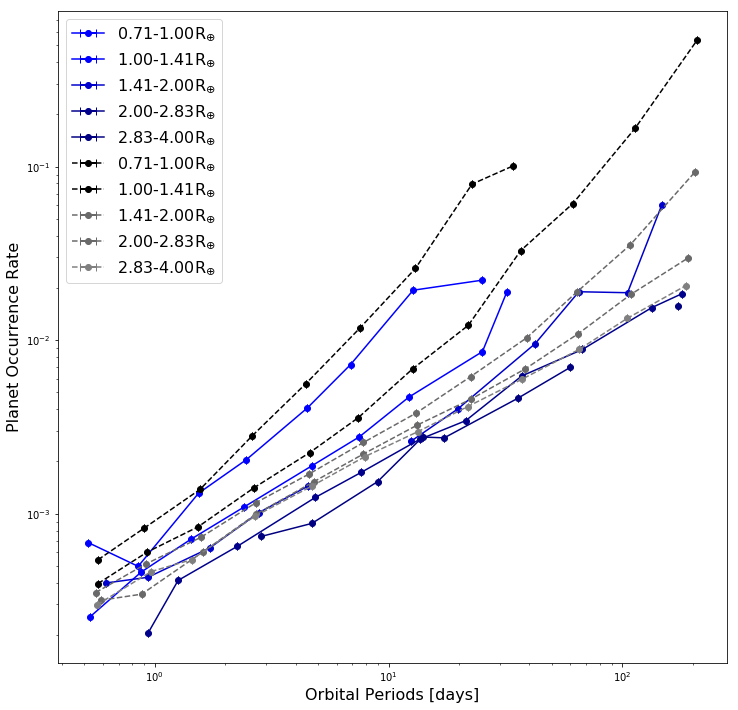

In [6]:
stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

focc=pd.read_csv('result/occurrence_rate_hot_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
fig=plt.figure(figsize=(12,12))
for k in range(2,7):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=bins_radius[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.mean(focc_temp))
        f_p_std.append((np.std(focc_temp)))
        p.append(np.mean(np.mean(p_temp)))
        p_std.append(np.std(np.std(p_temp)))
        
    plt.errorbar(p,f_p,xerr=p_std,fmt="o-",color=colors[k],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius[k])+'-'+'{:.2f}'.format(bins_radius[k+1])+'R$_{\oplus}$')


stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction.csv',sep=',')
focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_tot.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
#colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#fig=plt.figure(figsize=(12,12))
for k in range(2,7):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=bins_radius[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.mean(focc_temp)*14)
        f_p_std.append((np.std(focc_temp)))
        p.append(np.mean(np.mean(p_temp)))
        p_std.append(np.std(np.std(p_temp)))
        
    plt.errorbar(p,f_p,xerr=p_std,fmt="o--",color=colors[k-2],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius[k])+'-'+'{:.2f}'.format(bins_radius[k+1])+'R$_{\oplus}$')

#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Periods [days]', fontsize=16)
plt.ylabel('Planet Occurrence Rate',fontsize=16,)
plt.legend(loc='best',fontsize=16)
plt.savefig('result/focc_rp_totvshot_2020.eps')

In [2]:
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')
len(koi_table)
print(4714/len(koi_table))

14.071641791044776


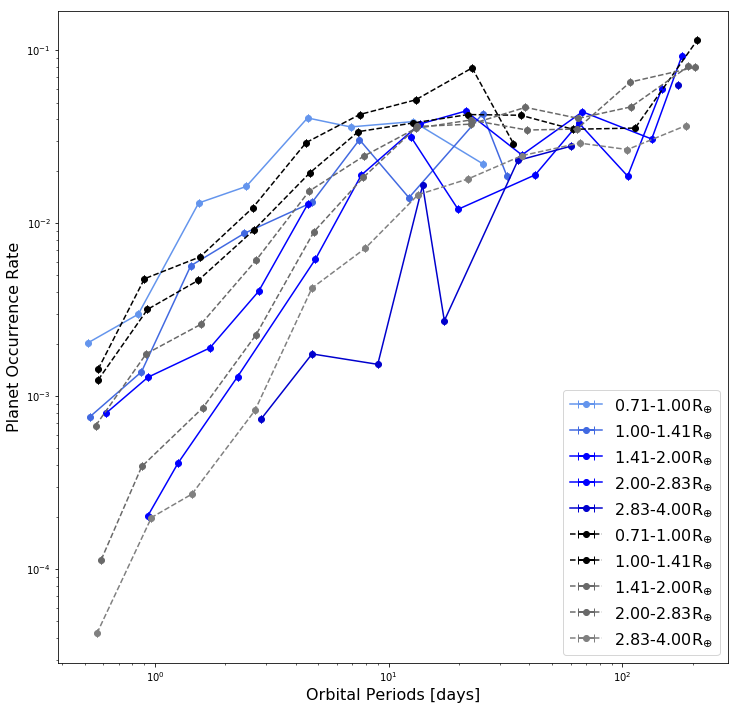

In [11]:
stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

focc=pd.read_csv('result/occurrence_rate_hot_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
fig=plt.figure(figsize=(12,12))
for k in range(2,7):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=bins_radius[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append((np.std(focc_temp)))
        p.append(np.mean(np.mean(p_temp)))
        p_std.append(np.std(np.std(p_temp)))
        
    plt.errorbar(p,f_p,xerr=p_std,fmt="o-",color=colors[k-2],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius[k])+'-'+'{:.2f}'.format(bins_radius[k+1])+'R$_{\oplus}$')


stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_tot.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
#colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#fig=plt.figure(figsize=(12,12))
for k in range(2,7):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=bins_radius[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append((np.std(focc_temp)))
        p.append(np.mean(np.mean(p_temp)))
        p_std.append(np.std(np.std(p_temp)))
        
    plt.errorbar(p,f_p,xerr=p_std,fmt="o--",color=colors[k-2],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius[k])+'-'+'{:.2f}'.format(bins_radius[k+1])+'R$_{\oplus}$')

#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Periods [days]', fontsize=16)
plt.ylabel('Planet Occurrence Rate',fontsize=16,)
plt.legend(loc='best',fontsize=16)
plt.savefig('result/focc_rp_totvshot_2020.eps')

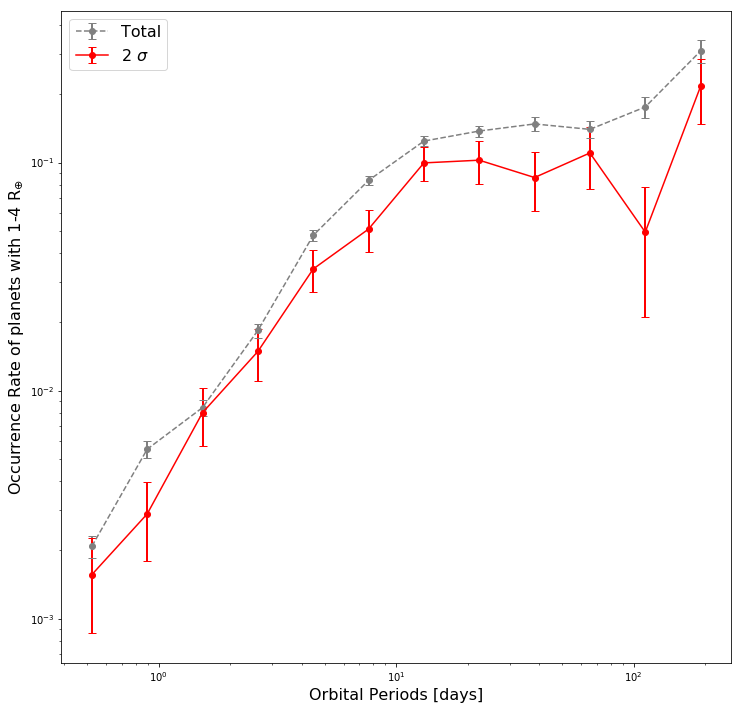

In [3]:
bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
tot 
'''
stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_tot.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

fig=plt.figure(figsize=(12,12))
colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
#colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#fig=plt.figure(figsize=(12,12))
#for k in range(2,7):
f_p=[]
f_p_std=[]
p=[]
p_std=[]
for i in range(0,len(bins_period)-1):
    focc_temp=[]
    p_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
        and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:     
            focc_temp.append(f_occurrence_everyplanet[j])
            p_temp.append(koi_table['koi_period'][f_id[j]])
            
    f_p.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
    p_std.append(np.std(p_temp))
        
plt.errorbar(p,f_p,yerr=f_p_std,fmt="o--",color='grey',elinewidth=2,capsize=4,label='Total')



'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
1sigma 

stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_rate_hot_2020.csv')

f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']

#for k in range(2,7):
f_p=[]
f_p_std=[]
p=[]
p_std=[]
for i in range(0,len(bins_period)-1):
    focc_temp=[]
    p_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
        and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:       
            focc_temp.append(f_occurrence_everyplanet[j])
            p_temp.append(koi_table['koi_period'][f_id[j]])
            
    f_p.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    p.append(np.mean(np.mean(p_temp)))
    p_std.append(np.std(np.std(p_temp)))
        
plt.errorbar(p,f_p,yerr=f_p_std,fmt="o-",color='black',elinewidth=2,capsize=4,label='1 $\sigma$')




%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
1.5sigma 

stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/result/occurrence_rate_hot_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#for k in range(2,7):
f_p=[]
f_p_std=[]
p=[]
p_std=[]
for i in range(0,len(bins_period)-1):
    focc_temp=[]
    p_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
        and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:       
            focc_temp.append(f_occurrence_everyplanet[j])
            p_temp.append(koi_table['koi_period'][f_id[j]])
            
    f_p.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    p.append(np.mean(np.mean(p_temp)))
    p_std.append(np.std(np.std(p_temp)))
        
plt.errorbar(p,f_p,yerr=f_p_std,fmt="o-",color='b',elinewidth=2,capsize=4,label='1.5 $\sigma$')
'''

'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
2sigma 
'''
stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_2sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_2sigma/result/occurrence_rate_hot_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#for k in range(2,7):
f_p=[]
f_p_std=[]
p=[]
p_std=[]
for i in range(0,len(bins_period)-1):
    focc_temp=[]
    p_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
        and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:       
            focc_temp.append(f_occurrence_everyplanet[j])
            p_temp.append(koi_table['koi_period'][f_id[j]])
            
    f_p.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
    p_std.append(np.std(p_temp))
        
plt.errorbar(p,f_p,yerr=f_p_std,fmt="o-",color='red',elinewidth=2,capsize=4,label='2 $\sigma$ ')


#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Periods [days]', fontsize=16)
plt.ylabel('Occurrence Rate of planets with 1-4 R$_{\oplus}$',fontsize=16,)
plt.legend(loc='best',fontsize=16)


plt.savefig('result/focc_rp_totvshot_2020.eps')

#add the error bar

/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


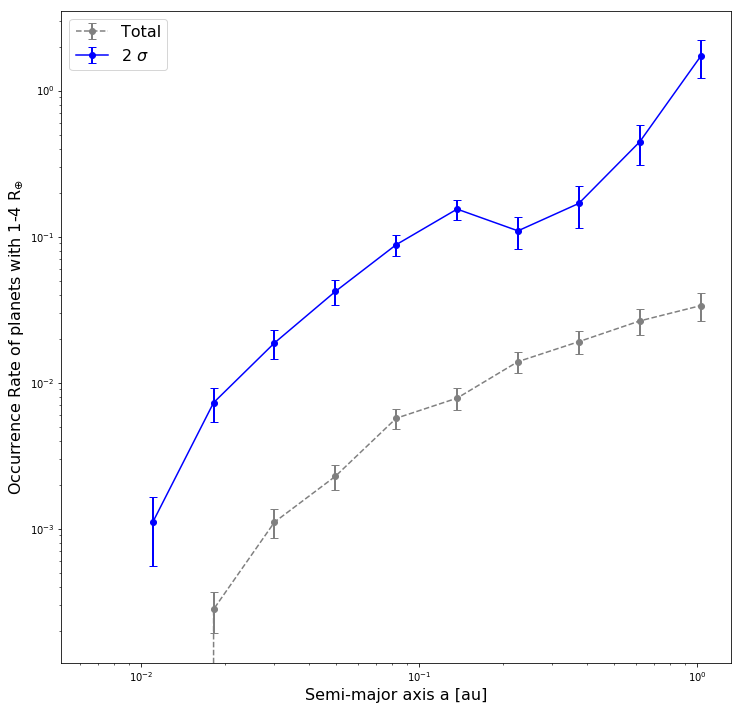

In [6]:
#change the Orbital periods to semi-major axis 

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  
bins_a=np.logspace(math.log(0.005,2),math.log(1.28,2),12,base=2)
'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
tot 
'''
stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_tot.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

fig=plt.figure(figsize=(12,12))
colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
#colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#fig=plt.figure(figsize=(12,12))
#for k in range(2,7):
a_koi=[]
for i in range(0,len(f_occurrence_everyplanet)):
    a_koi.append(a(koi_table['mass'][i],koi_table['koi_period'][i])/c.au.value)
   
f_p=[]
f_p_std=[]
semi_a=[]
semi_a_std=[]
for i in range(0,len(bins_a)-1):
    focc_temp=[]
    a_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if a_koi[f_id[j]]<bins_a[i+1] and a_koi[f_id[j]]>=bins_a[i] \
        and koi_table['koi_prad'][f_id[j]]<=8 and koi_table['koi_prad'][f_id[j]]>=4:     
            focc_temp.append(f_occurrence_everyplanet[j])
            a_temp.append(a_koi[f_id[j]])
            
    f_p.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    semi_a.append((bins_a[i+1]+bins_a[i])/2)
    semi_a_std.append(np.std(p_temp))
        
plt.errorbar(semi_a,f_p,yerr=f_p_std,fmt="o--",color='grey',elinewidth=2,capsize=4,label='Total')



'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
1sigma 

stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_rate_hot_2020.csv')

f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']

#for k in range(2,7):
f_p=[]
f_p_std=[]
p=[]
p_std=[]
for i in range(0,len(bins_period)-1):
    focc_temp=[]
    p_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
        and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:       
            focc_temp.append(f_occurrence_everyplanet[j])
            p_temp.append(koi_table['koi_period'][f_id[j]])
            
    f_p.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    p.append(np.mean(np.mean(p_temp)))
    p_std.append(np.std(np.std(p_temp)))
        
plt.errorbar(p,f_p,yerr=f_p_std,fmt="o-",color='black',elinewidth=2,capsize=4,label='1 $\sigma$')




%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
1.5sigma 

stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/result/occurrence_rate_hot_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#for k in range(2,7):
f_p=[]
f_p_std=[]
p=[]
p_std=[]
for i in range(0,len(bins_period)-1):
    focc_temp=[]
    p_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
        and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:       
            focc_temp.append(f_occurrence_everyplanet[j])
            p_temp.append(koi_table['koi_period'][f_id[j]])
            
    f_p.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    p.append(np.mean(np.mean(p_temp)))
    p_std.append(np.std(np.std(p_temp)))
        
plt.errorbar(p,f_p,yerr=f_p_std,fmt="o-",color='b',elinewidth=2,capsize=4,label='1.5 $\sigma$')
'''

'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
2sigma 
'''
stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_2sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_2sigma/result/occurrence_rate_hot_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']

#colors=['black','k','dimgray','dimgrey','grey','gray','darkgrey','darkgray','silver','lightgray','lightgrey','gainsboro']
colors=['cornflowerblue','royalblue','b','blue','mediumblue','darkblue','navy','midnightblue','k']
#for k in range(2,7):
a_koi=[]
for i in range(0,len(f_occurrence_everyplanet)):
    a_koi.append(a(koi_table['mass'][i],koi_table['koi_period'][i])/c.au.value)
   
f_p=[]
f_p_std=[]
semi_a=[]
semi_a_std=[]
for i in range(1,len(bins_a)-1):
    focc_temp=[]
    a_temp=[]
    for j in range(0,len(f_occurrence_everyplanet)):
        if a_koi[f_id[j]]<bins_a[i+1] and a_koi[f_id[j]]>=bins_a[i] \
        and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:     
            focc_temp.append(f_occurrence_everyplanet[j])
            a_temp.append(a_koi[f_id[j]])
            
    f_p.append(np.sum(focc_temp))
    f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
    semi_a.append((bins_a[i+1]+bins_a[i])/2)
    semi_a_std.append(np.std(p_temp))

plt.errorbar(semi_a,f_p,yerr=f_p_std,fmt="o-",color='b',elinewidth=2,capsize=4,label='2 $\sigma$')


#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-major axis a [au]', fontsize=16)
plt.ylabel('Occurrence Rate of planets with 1-4 R$_{\oplus}$',fontsize=16,)
plt.legend(loc='best',fontsize=16)


plt.savefig('result/focc_a_totvshot_2020.eps')

#add the error bar

In [35]:
print(np.min(a_koi),np.max(a_koi))

0.005879965809567125 2.1520768532612458


In [23]:
#calculate average number of planets per exoplanets system
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_hot.csv',sep=',')

koi_num=[]
koi_id=[]
i=0
while i < len(koi_table)-1:
    count=1
    for j in range(i+1,len(koi_table)):
        if koi_table['kepid'][i]==koi_table['kepid'][j]:
            count+=1
        else:
            
            break           
        
    koi_num.append(count)
    koi_id.append(i)
    i=j
    
koi_num.append(1)
koi_id.append(j)

In [24]:
print(len(koi_num))
print(koi_id)

280
[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 110, 111, 112, 113, 114, 115, 119, 122, 123, 125, 126, 129, 131, 132, 133, 134, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 155, 157, 158, 159, 160, 161, 162, 163, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 233, 236, 237, 238, 239, 240, 241, 243, 244, 245, 246, 248, 250, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261,

In [26]:
with open('result/koi_number_hot_2020.csv','w') as f:
    s=['kepid',
       'koi_number',
       'teff_b2018']
    writer=csv.DictWriter(f,fieldnames=s)
    writer.writeheader()
    for i in range(0,len(koi_num)):
            writer.writerow({'kepid':koi_table['kepid'][koi_id[i]],
                             'koi_number':koi_num[i],
                             'teff_b2018':koi_table['teff_b2018'][koi_id[i]]})